In [2]:
# Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Get raw 2.1.1 data
%store -r data_frame_2_1_1_preexclusions
data_frame = data_frame_2_1_1_preexclusions

In [5]:
# Get quantity of subjects initially:
len(data_frame['uniqueid'].unique())

371

In [6]:
'''
Functions to compute accuracies:
'''

def getComparisonAccuracy(df, comp1, comp2):
    
    # only correct responses
    correct_df = df[df['chosen_side'] == df['correct_side']]

    # correct responses -- in form [x, y] and [y, x] where x and y are distances
    left_correct = len(correct_df[correct_df['left_comp_type'] == comp1][correct_df['right_comp_type'] == comp2])
    right_correct = len(correct_df[correct_df['left_comp_type'] == comp2][correct_df['right_comp_type'] == comp1])
    
    # all responses -- again in form [x, y] and [y, x]                                                                                                                                                                                                                                                                                                                                                                    
    left = len(df[df['left_comp_type'] == comp1][df['right_comp_type'] == comp2])
    right = len(df[df['left_comp_type'] == comp2][df['right_comp_type'] == comp1])
    return (left_correct + right_correct)/(left + right)

def getFirstDistanceAccuracy(df, dist):
    second_distances = [6, 8, 10, 16, 22, 30, 40]
    total = 0
    num = 0
    for i in second_distances:
        if (i > dist):
            total += getComparisonAccuracy(df, dist, i)
            num += 1
    return total / num

def getSecondDistanceAccuracy(df, dist):
    first_distances = [4, 6, 8, 10, 14, 18, 22, 28, 34]
    total = 0
    num = 0
    for i in first_distances:
        if (i < dist):
            total += getComparisonAccuracy(df, dist, i)
            num += 1
    return total / num

def getOverallAccuracy(df):
    first_distances = [4, 6, 8, 10, 14, 18, 22, 28, 34]
    total = 0
    for i in first_distances:
        total += getFirstDistanceAccuracy(df, i)
    return total / len(first_distances)

In [7]:
# block_number 0 == practice

In [8]:
data_frame.columns

Index(['rt', 'responses', 'type', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'uniqueid', 'stimulus', 'key_press',
       'button_pressed', 'color', 'block_number', 'left_word_study',
       'right_word_study', 'trial_period', 'left_word_test', 'right_word_test',
       'chosen_side', 'comparison_type', 'left_comp_type', 'right_comp_type',
       'correct_side', 'question_order', 'required', 'further_experiments'],
      dtype='object')

In [9]:
study_test_df = data_frame.query('block_number > 0 and trial_period == trial_period')

In [10]:
test_df = study_test_df.query('trial_period == "test"')

In [11]:
test_df['correct'] = test_df['correct_side'] == test_df['chosen_side']
acc_df = test_df.groupby('uniqueid').agg({'correct': 'mean'}).reset_index()

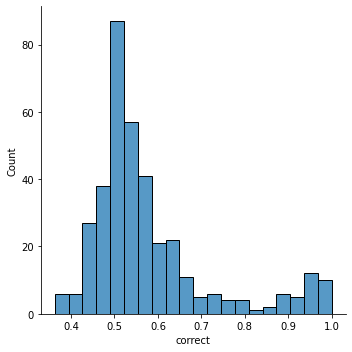

In [19]:
fig = sns.displot(x='correct', data=acc_df)
fig.savefig('accuracy_dist.pdf')

In [13]:
test_df['more_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].min(axis=1)
test_df['less_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].max(axis=1)

In [14]:
acc_by_comp_type_df = test_df.groupby(['uniqueid', 'more_recent_probe', 'less_recent_probe']).agg({'correct': 'mean'}).reset_index()

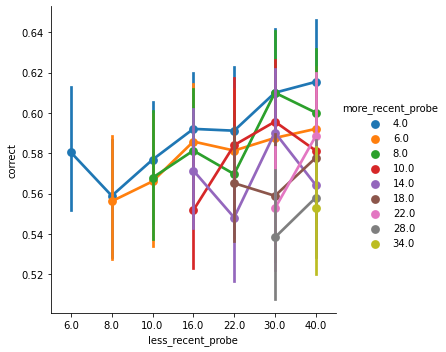

In [16]:
#rel
# sns.relplot(x='less_recent_probe', y='correct', hue='more_recent_probe', data=acc_by_comp_type_df, kind='line')
sns.catplot(x='less_recent_probe', y='correct', hue='more_recent_probe', data=acc_by_comp_type_df, kind='point')

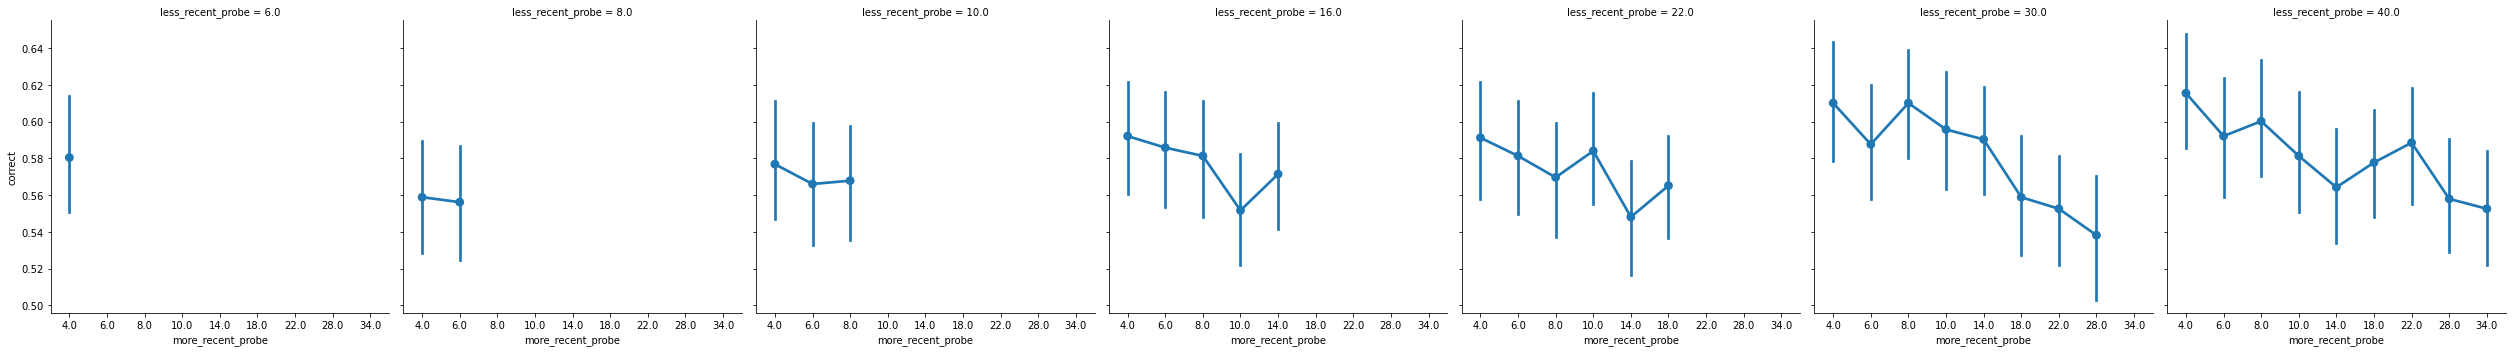

In [64]:
sns.catplot(x='more_recent_probe', y='correct', col='less_recent_probe', data=acc_by_comp_type_df, kind='point')

In [5]:
# using this as sample uniqueid: A102WSFN62OS6I:3BWI6RSP7HGHP50Q24JSWZW2591E74

# test_id = "A102WSFN62OS6I:3BWI6RSP7HGHP50Q24JSWZW2591E74"
# test_df = data_frame_2_1_1[data_frame_2_1_1['uniqueid'] == test_id]
# test_corr_df = test_df[test_df['chosen_side'] == test_df['correct_side']]
# x = test_corr_df['comparison_type'].iloc[0]
# test_corr_df[test_corr_df['comparison_type'] in [x]]

In [6]:
# Get accuracies 
accuracies = []
for i in data_frame['uniqueid'].unique():
    
    # print random uniqueids so we can look at them individually
    if random.randint(0, 100) < 1:
        print(i)

    df = data_frame[data_frame['uniqueid'] == i]
    accuracies.append(getOverallAccuracy(df))

A1CB9NR3SN4VMY:38F71OA9GU3SGM791L5NXZESCZBMF5
A1R5JNC2LO6X1S:3M81GAB8A1QTOKTLOCQ8VI7C7UPBQS
A2UMKX6UYXQ6B9:3UWN2HHPUZC729XVJ6KMHDM767NNSH
A30NL5N71G2YAU:3WETL7AQWUFZS36APRNZFOE9N6R35I


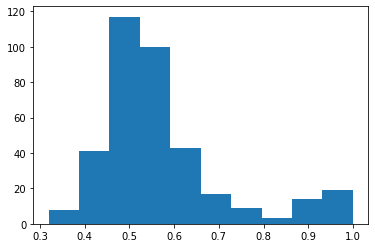

In [7]:
# plot histogram
plt.hist(accuracies)
plt.show()

In [ ]:
import seaborn as sns
sns.displot(corr_rts, bins=82, kde=True)

In [ ]:
sample = ['A1CB9NR3SN4VMY:38F71OA9GU3SGM791L5NXZESCZBMF5'
'A1R5JNC2LO6X1S:3M81GAB8A1QTOKTLOCQ8VI7C7UPBQS'
'A2UMKX6UYXQ6B9:3UWN2HHPUZC729XVJ6KMHDM767NNSH'
'A30NL5N71G2YAU:3WETL7AQWUFZS36APRNZFOE9N6R35I']

